# House prices advanced regression techniques

The goal is to predict the price of a house using a machine learning model

## 1. Importing the data and libraries

In [1]:
# data analysis libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

import os
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None) # makes pandas show all the columns of the dataframe instead of ...
sns.set_style("darkgrid")

In [2]:
# print the name of the files in the specified route
for dirname, _, filenames in os.walk("../data"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data\data_description.txt
../data\test.csv
../data\train.csv


In [3]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

## 2. Exploratory data analysis (EDA)

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Finding out if there is duplicated data

In [8]:
train.duplicated().sum()

0

### 2.1 Cleaning up the data

Finding out which columns have NaN in the training dataset

In [9]:
nanCols = train.columns[train.isna().any()].tolist() # create a list with all the columns names that have NaN

In [10]:
# Iterate through the list and then print the column name along with the number of NaN it has
print("Training dataset: Column name, Number of NaN rows, Percentage \n")
for col in nanCols:
    print(f"{train[col].name}: {train[col].isna().sum()}, {round(train[col].isna().sum() / train[col].shape[0] * 100)}% ")

Training dataset: Column name, Number of NaN rows, Percentage 

LotFrontage: 259, 18% 
Alley: 1369, 94% 
MasVnrType: 8, 1% 
MasVnrArea: 8, 1% 
BsmtQual: 37, 3% 
BsmtCond: 37, 3% 
BsmtExposure: 38, 3% 
BsmtFinType1: 37, 3% 
BsmtFinType2: 38, 3% 
Electrical: 1, 0% 
FireplaceQu: 690, 47% 
GarageType: 81, 6% 
GarageYrBlt: 81, 6% 
GarageFinish: 81, 6% 
GarageQual: 81, 6% 
GarageCond: 81, 6% 
PoolQC: 1453, 100% 
Fence: 1179, 81% 
MiscFeature: 1406, 96% 


In [11]:
def dataCleaner(data):
    uselessCols = ["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu","PoolQC","Fence","MiscFeature","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF"]
    numericCols = ["LotFrontage","MasVnrArea","GarageYrBlt"]
    objectCols = ["MasVnrType","Electrical","GarageType","GarageFinish","GarageQual","GarageCond"]
    
    # drop the columns that doesn't provide us usefull data or have a lots of NaN 
    data.drop(uselessCols, axis= 1, inplace=True)
    
    # Fill the NaN rows of each object type column with the mode value in said column
    for col in objectCols:
        data[col].fillna(data[col].mode()[0], inplace=True)
    
    # Fill the NaN of each numeric type column with the mean value that of said column
    for col in numericCols:
        data[col].fillna(data[col].mean(), inplace=True)
    
    # transform the GarageYrBlt column to the right format
    data["GarageYrBlt"] = data["GarageYrBlt"].astype(int)
    
    return data

In [12]:
dataCleaner(train)
dataCleaner(test)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1992,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,Attchd,1977,Unf,0.0,0.0,TA,TA,Y,0,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,CarPort,1970,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,Detchd,1960,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,Attchd,1977,Unf,0.0,0.0,TA,TA,Y,80,32,0,0,0,0,700,7,2006,WD,Normal


In [13]:
print(train.shape)
print(test.shape)

(1460, 68)
(1459, 67)


Just in case let's check if the test dataset contains NaN

In [14]:
nanCols = test.columns[test.isna().any()].tolist()

In [15]:
print("Testing dataset: Column name, Number of NaN rows, Percentage \n")
for col in nanCols:
    print(f"{test[col].name}: {test[col].isna().sum()}, {round(test[col].isna().sum() / test[col].shape[0] * 100)}% ")

Testing dataset: Column name, Number of NaN rows, Percentage 

MSZoning: 4, 0% 
Utilities: 2, 0% 
Exterior1st: 1, 0% 
Exterior2nd: 1, 0% 
TotalBsmtSF: 1, 0% 
BsmtFullBath: 2, 0% 
BsmtHalfBath: 2, 0% 
KitchenQual: 1, 0% 
Functional: 2, 0% 
GarageCars: 1, 0% 
GarageArea: 1, 0% 
SaleType: 1, 0% 


Apparently we need to clean the testing dataset too

In [16]:
objectCols = ["MSZoning","Utilities","Exterior1st","Exterior2nd","KitchenQual","Functional","SaleType"]
numericCols = ["TotalBsmtSF","BsmtFullBath","BsmtHalfBath","GarageCars","GarageArea"]

for col in objectCols:
    test[col].fillna(test[col].mode()[0], inplace=True)

for col in numericCols:
    test[col].fillna(test[col].mean(), inplace=True)

In [17]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


##### Question 1: how much did houses cost over the years?

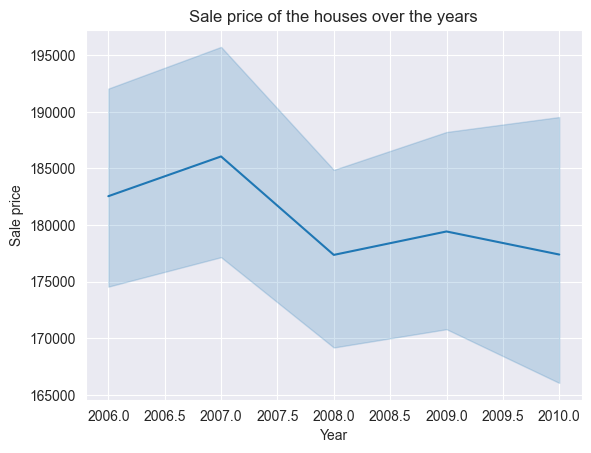

In [18]:
sns.lineplot(x=train["YrSold"], y=train["SalePrice"])
plt.title("Sale price of the houses over the years")
plt.xlabel("Year")
plt.ylabel("Sale price")
plt.show()

##### Question 2: in which condition were the houses when they were sold?

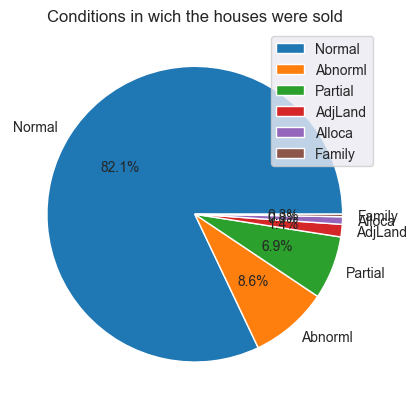

In [19]:
plt.pie(train["SaleCondition"].value_counts(), labels=train["SaleCondition"].unique(),autopct='%1.1f%%')
plt.title("Conditions in wich the houses were sold")
plt.legend()
plt.show()

##### Question 3: how many houses were sold each year?

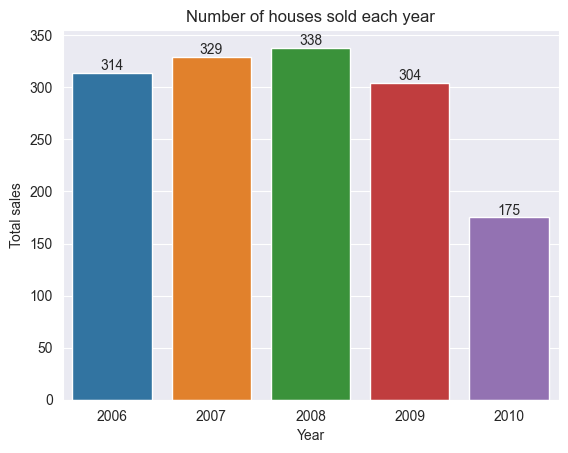

In [20]:
ax = sns.barplot(x=train["YrSold"].unique(), y=train["YrSold"].value_counts().unique())
ax.bar_label(ax.containers[0])
plt.title("Number of houses sold each year")
plt.xlabel("Year")
plt.ylabel("Total sales")
plt.show()

##### Question 4: how big was the land area and for how much was it sold for?

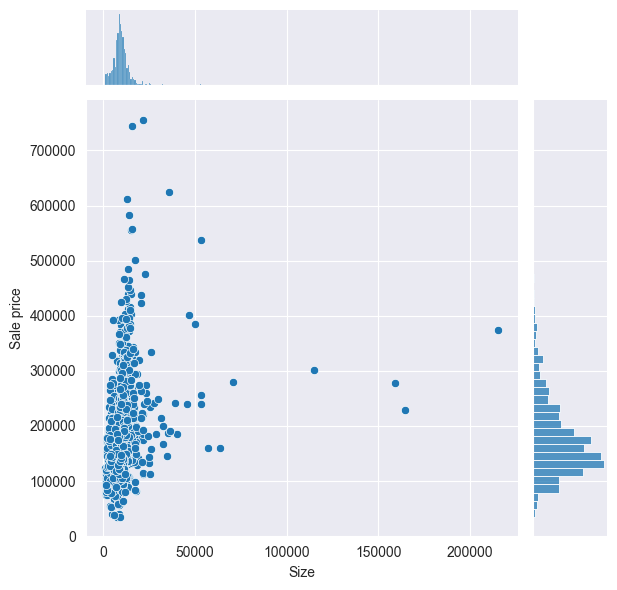

In [21]:
sns.jointplot(x=train["LotArea"], y=train["SalePrice"])
plt.xlabel("Size")
plt.ylabel("Sale price")
plt.show()

##### Question 5: what is the price of a house in each neighborhood?

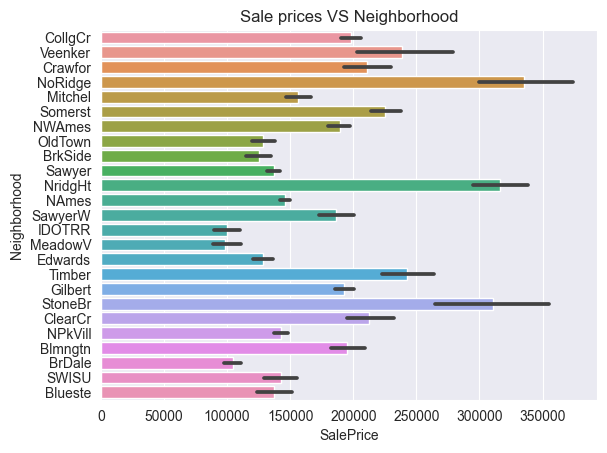

In [22]:
sns.barplot(x=train["SalePrice"], y=train["Neighborhood"])
plt.title("Sale prices VS Neighborhood")
plt.show()

##### Question 6: what is the proportion bathrooms per house?

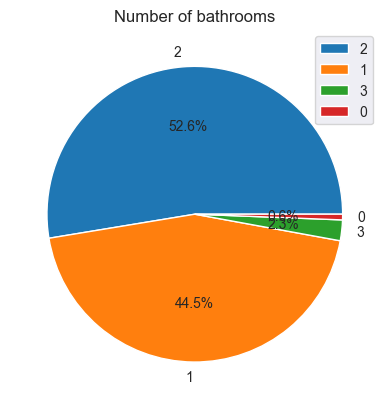

In [23]:
plt.pie(train["FullBath"].value_counts(), labels=train["FullBath"].unique(),autopct='%1.1f%%')
plt.title("Number of bathrooms")
plt.legend()
plt.show()

most of the houses have between 1 to 2 bathrooms 

##### Question 7: what is the price of a house by number of bathrooms?

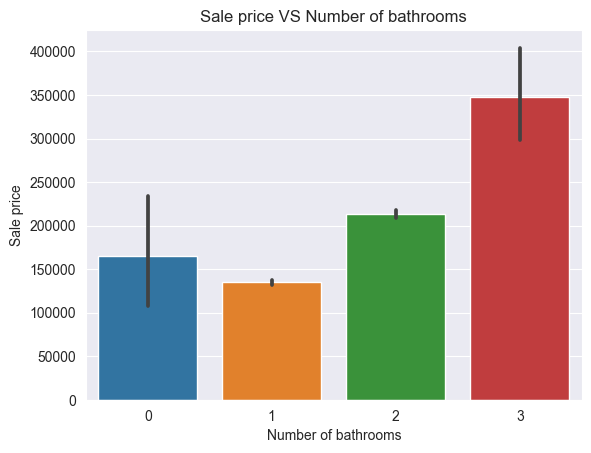

In [24]:
sns.barplot(x=train["FullBath"], y=train["SalePrice"])
plt.title("Sale price VS Number of bathrooms")
plt.xlabel("Number of bathrooms")
plt.ylabel("Sale price")
plt.show()

##### Question 8: what is the price of a house by number of bedrooms?

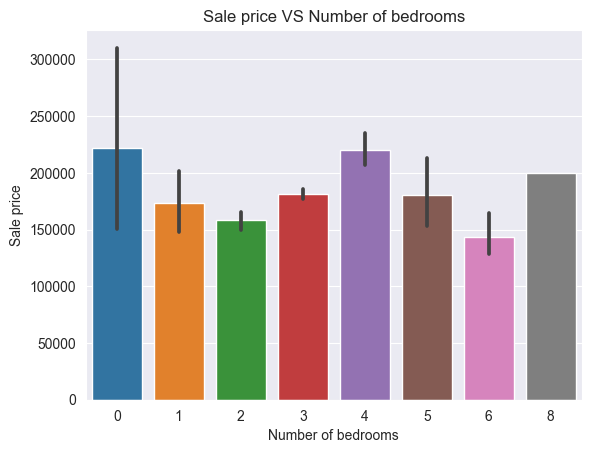

In [25]:
sns.barplot(x=train["BedroomAbvGr"], y=train["SalePrice"])
plt.title("Sale price VS Number of bedrooms")
plt.xlabel("Number of bedrooms")
plt.ylabel("Sale price")
plt.show()

##### Question 9: does a recently built house cost more than an old one?

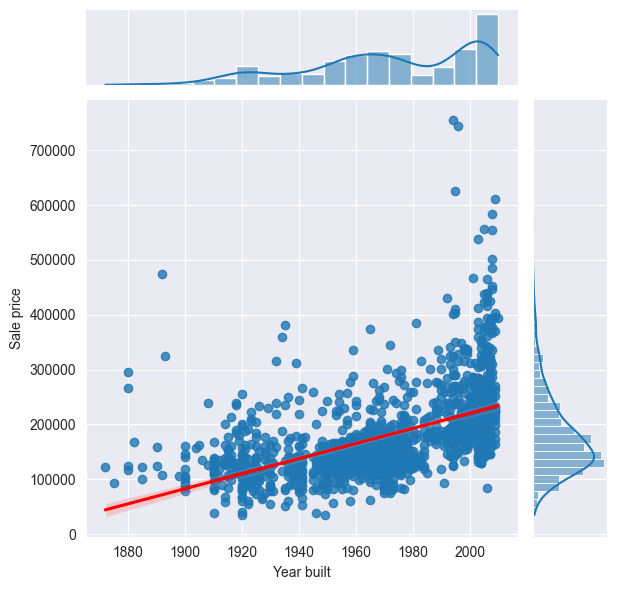

In [26]:
sns.jointplot(x=train["YearBuilt"], y=train["SalePrice"], kind='reg', joint_kws={'line_kws':{'color':'red'}})
plt.xlabel("Year built")
plt.ylabel("Sale price")
plt.show()

##### Question 10: what style of house was sold the most?

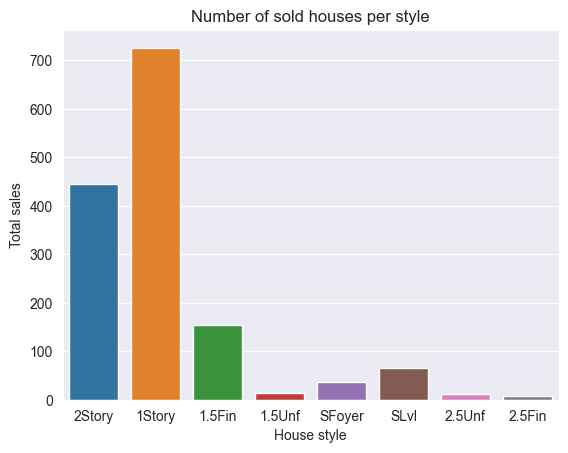

In [27]:
sns.countplot(x=train["HouseStyle"])
plt.title("Number of sold houses per style")
plt.xlabel("House style")
plt.ylabel("Total sales")
plt.show()

##### Question 11: how big is each lot based on its shape?

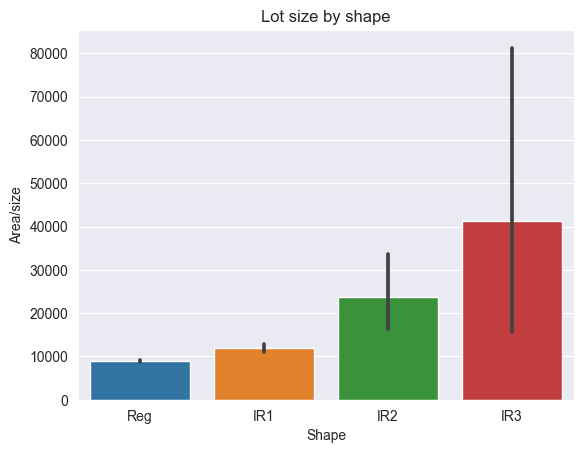

In [28]:
sns.barplot(x=train["LotShape"], y=train["LotArea"])
plt.title("Lot size by shape")
plt.xlabel("Shape")
plt.ylabel("Area/size")
plt.show()

##### Question 12: what is the price of a house for each type of foundation?

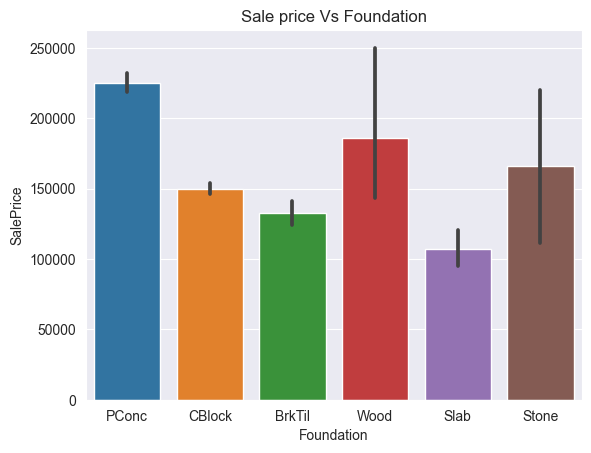

In [29]:
sns.barplot(x=train["Foundation"], y=train["SalePrice"])
plt.title("Sale price Vs Foundation")
plt.show()

### 2.2 Univariate Analysis

In Univariate Analysis, you analyze data of just one variable. A variable in your dataset refers to a single feature/ column. You can do this either with graphical or non-graphical means by finding specific mathematical values in the data. Some visual methods include:

1. Histograms: Bar plots in which the frequency of data is represented with rectangle bars.
2. Box-plots: Here the information is represented in the form of boxes.

##### Question 13: what is the data Distribution of saleprice in our Dataset?

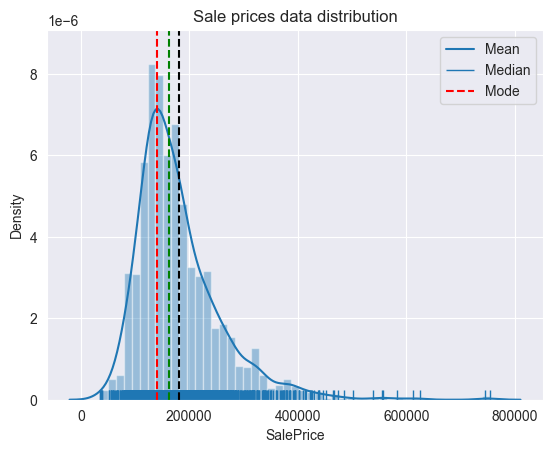

In [30]:
sns.distplot(train["SalePrice"], kde=True, rug=True)
plt.axvline(train["SalePrice"].mode().values[0],color='red', linestyle='--') # adds a vertical line showing the mode
plt.axvline(np.median(train["SalePrice"]),color='green', linestyle='--') # adds a vertical line showing the median
plt.axvline(np.mean(train["SalePrice"]),color='black', linestyle='--') # adds a vertical line showing the mean
plt.legend(labels=["Mean","Median","Mode"])
plt.title("Sale prices data distribution")
plt.show()

From the above graph, you can say that the graph deviates from the normal and is positively skewed.
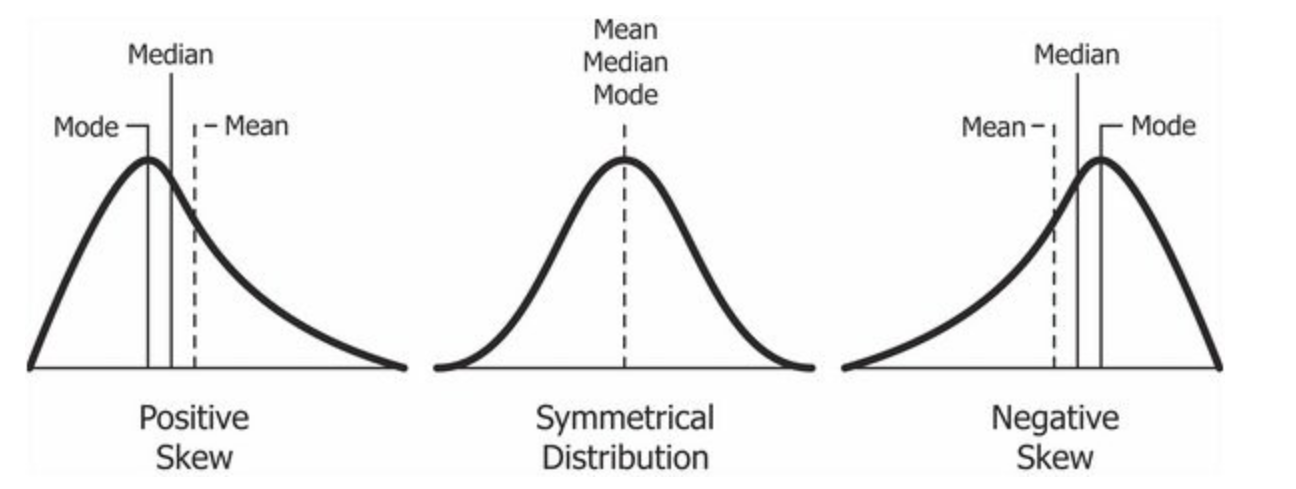

Now we have to find the Skewness and Kurtosis of the graph

In [31]:
# skewness and kurtosis
print("Skewness: %f" % train["SalePrice"].skew())
print("Kurtosis: %f" % train["SalePrice"].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In kurtosis, a positive curve indicates a relatively high distribution, while a negative curve indicates a relatively flat distribution.

To understand exactly which variables are outliers, we need to establish a threshold. To do this, we have to standardize the data. Hence, the data should have a mean of 1 and a standard deviation of 0. 

#### 2.2.1 Standardising data

In [32]:
# standarizing the data
ss = StandardScaler()
saleprice_scaled = ss.fit_transform(train["SalePrice"][:, np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:-10]
print(f"outer range (low) of the distribution: \n {low_range}")
print(f"\nouter range (high) of the distribution: \n {high_range}")

outer range (low) of the distribution: 
 [[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution: 
 [[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 ...
 [ 3.57712976]
 [ 3.59601781]
 [ 3.70305009]]


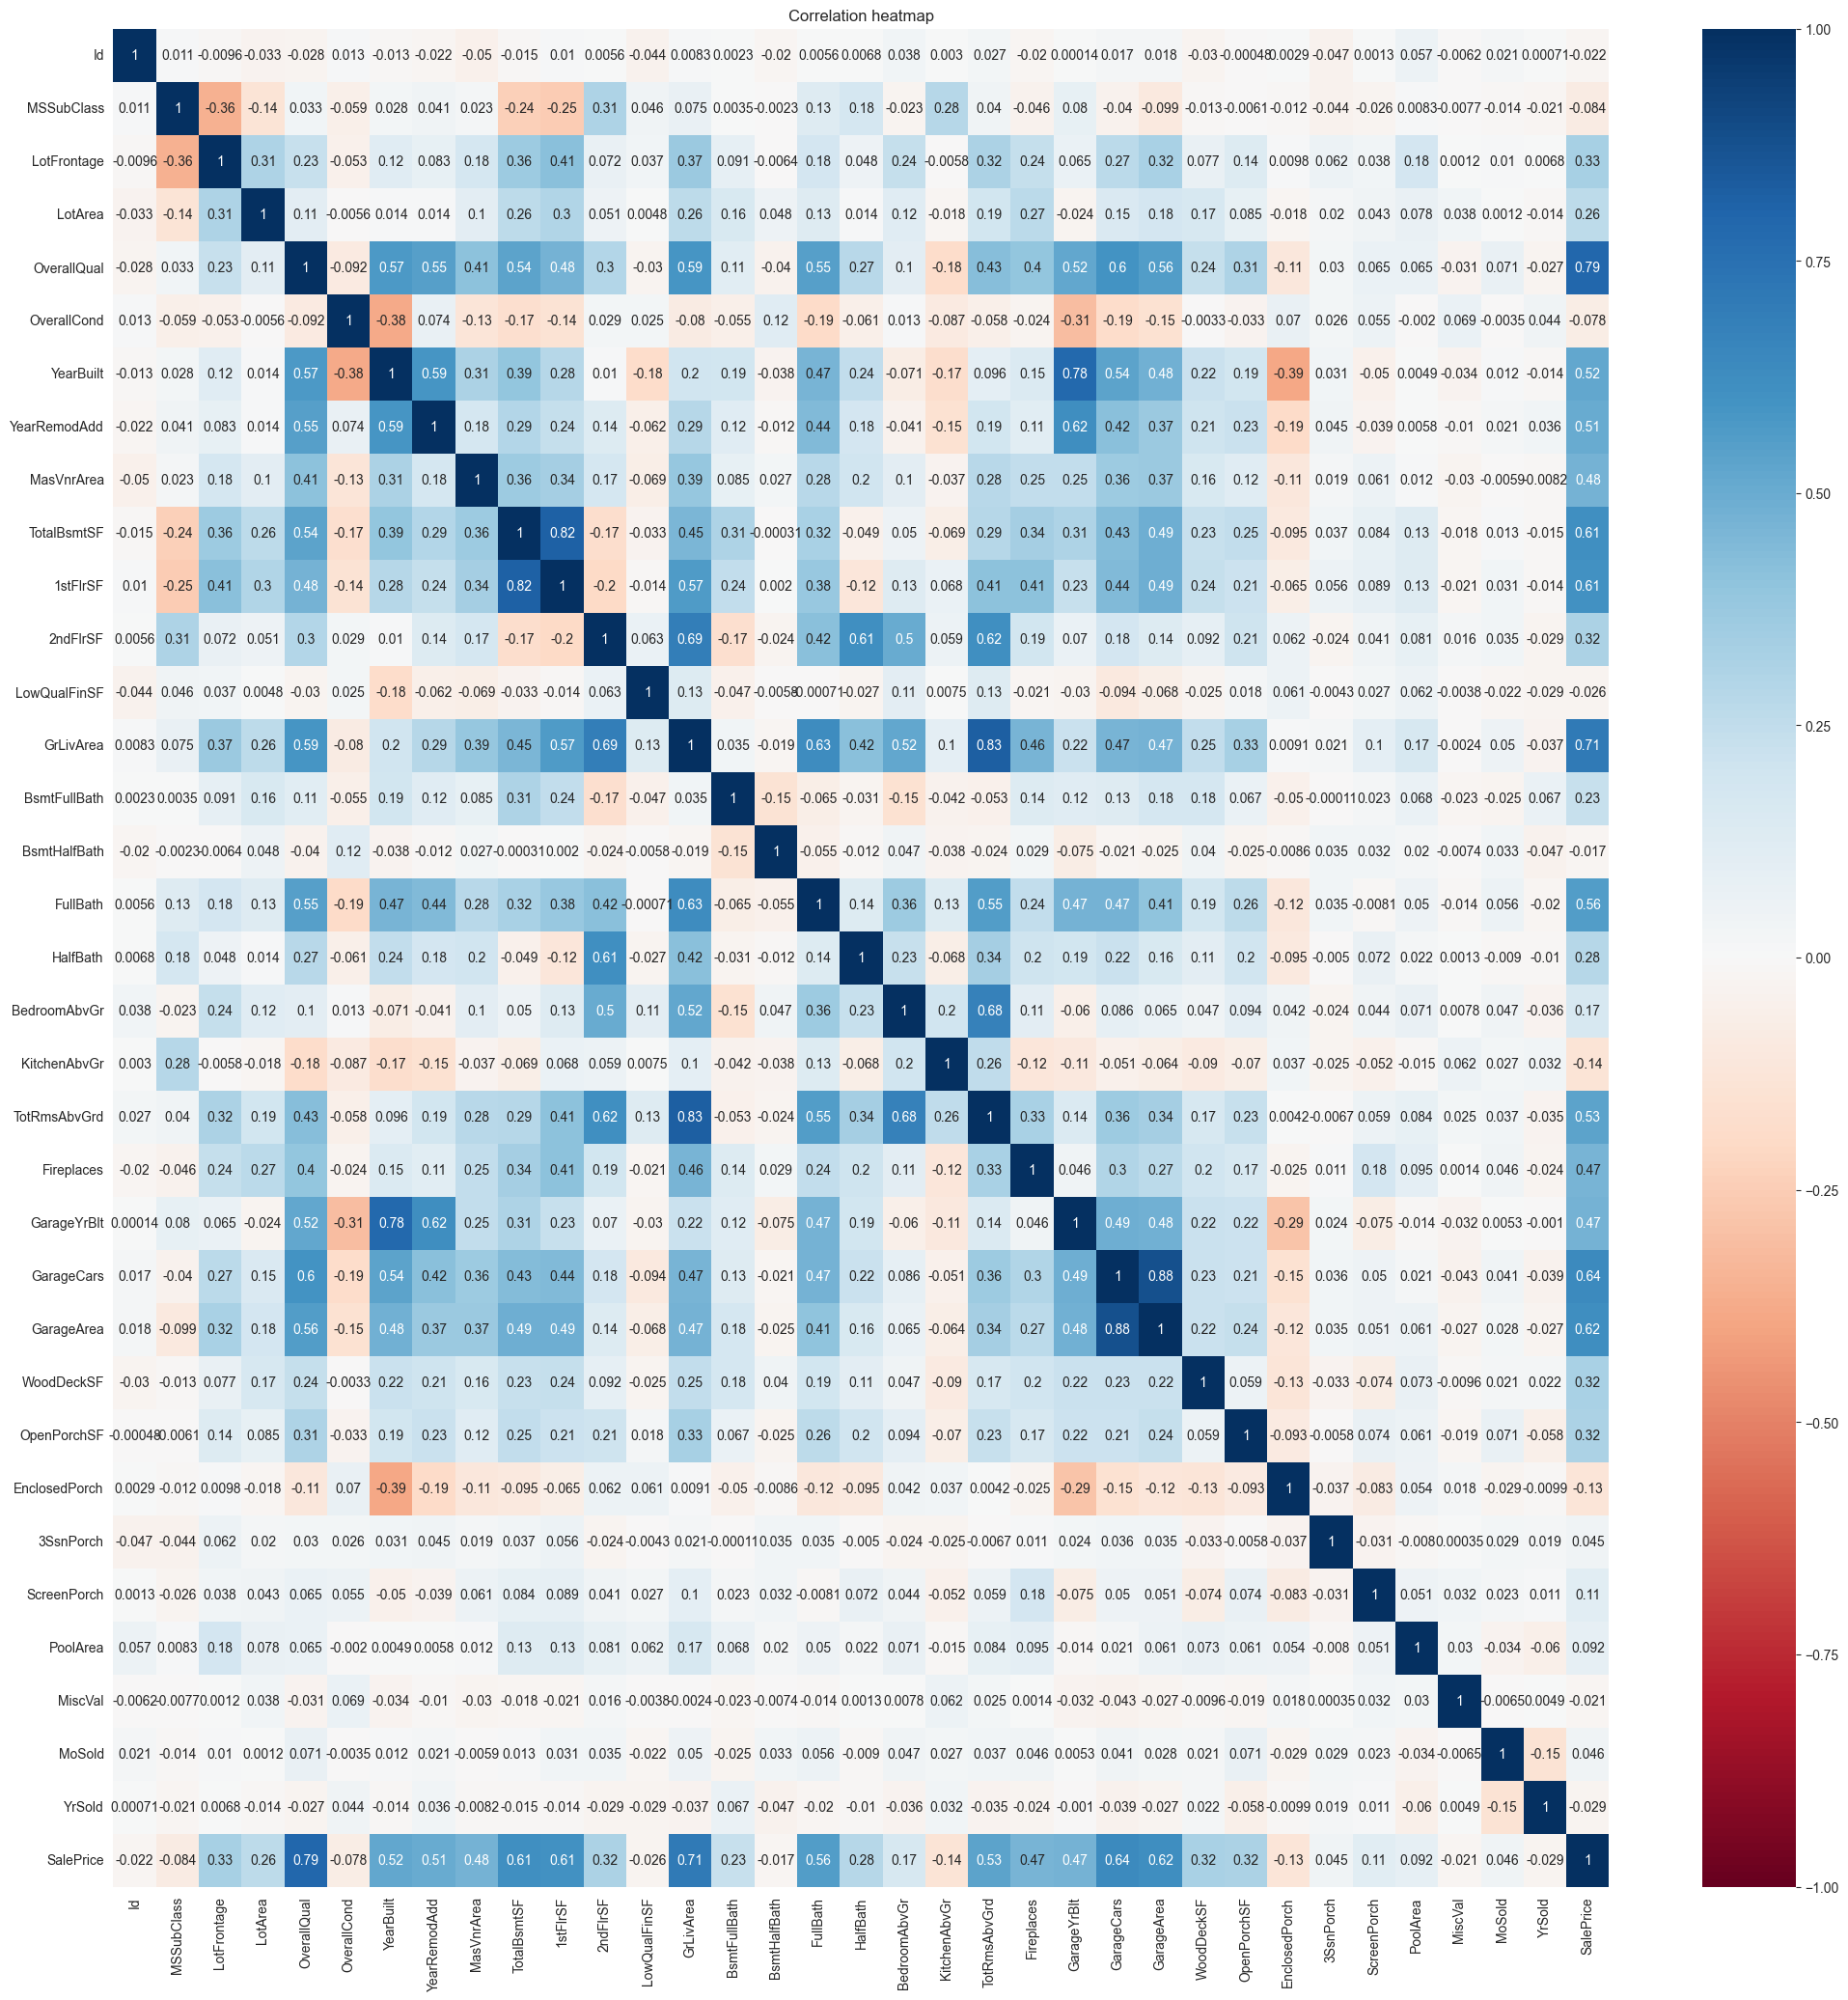

In [35]:
plt.figure(figsize=(25,25))
corr = train.corr()
sns.heatmap(corr, cmap="RdBu", vmin=-1, vmax=1, annot=True)
plt.title("Correlation heatmap")
plt.show()

## 3. Modeling

In [33]:
dropTrainCols= ["MSZoning","Street","LotShape","LandContour","Utilities","LotConfig","LandSlope",
        "Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl",
        "Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation","Heating","HeatingQC",
        "CentralAir","Electrical","KitchenQual","Functional","GarageType","GarageFinish","GarageQual","GarageCond",
        "PavedDrive","SaleType","SaleCondition","SalePrice"]

X = train.drop(dropTrainCols, axis=1)

y = train["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1168, 34)
(1168,)
(292, 34)
(292,)


Now we will test multiple regression models

In [35]:
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.kernel_ridge import KernelRidge

In [36]:
# training the models
lr = LinearRegression().fit(X_train, y_train)
bayridge = BayesianRidge().fit(X_train, y_train)
gbr = GradientBoostingRegressor().fit(X_train, y_train)
lgbm = LGBMRegressor().fit(X_train, y_train)
xgb = XGBRegressor().fit(X_train, y_train)
kridge = KernelRidge().fit(X_train, y_train)

LinearRegression

In [37]:
lr_y_pred = lr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(lr_y_pred, y_test))
# There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect.

# The coefficient of determination
print("Coefficient of determination (R-squared): %.2f" % r2_score(lr_y_pred, y_test))
# An rsquared of 1 indicates that predictions are identical to the observed values "100%", it is not possible to have a value of R² of more than 1.

Mean squared error: 2395025435.27
Coefficient of determination (R-squared): 0.64


BayesianRidge

In [38]:
bayridge_y_pred = bayridge.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(bayridge_y_pred, y_test))
print("Coefficient of determination (R-squared): %.2f" % r2_score(bayridge_y_pred, y_test))

Mean squared error: 3020979490.31
Coefficient of determination (R-squared): 0.50


GradientBoostingRegressor

In [39]:
gbr_y_pred = gbr.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(gbr_y_pred, y_test))
print("Coefficient of determination (R-squared): %.2f" % r2_score(gbr_y_pred, y_test))

Mean squared error: 836657321.38
Coefficient of determination (R-squared): 0.86


LGBMRegressor

In [40]:
lgbm_y_pred = lgbm.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(lgbm_y_pred, y_test))
print("Coefficient of determination (R-squared): %.2f" % r2_score(lgbm_y_pred, y_test))

Mean squared error: 1156982435.19
Coefficient of determination (R-squared): 0.80


XGBRegressor

In [41]:
xgb_y_pred = xgb.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(xgb_y_pred, y_test))
print("Coefficient of determination (R-squared): %.2f" % r2_score(xgb_y_pred, y_test))

Mean squared error: 1327682027.67
Coefficient of determination (R-squared): 0.76


KernelRidge

In [42]:
kridge_y_pred = kridge.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(kridge_y_pred, y_test))
print("Coefficient of determination (R-squared): %.2f" % r2_score(kridge_y_pred, y_test))

Mean squared error: 2394596228.42
Coefficient of determination (R-squared): 0.64


### 4. Saving the model that performed the best

In [43]:
from joblib import dump,load
# dump(gbr, "gradientBoostingRegressor-housePrediction-model.joblib")

In [44]:
model= load("gradientBoostingRegressor-housePrediction-model.joblib")

Testing the model

In [45]:
# before testing the model we need to make the testing dataset the same size as when we trained the model
dropTestCols= ["MSZoning","Street","LotShape","LandContour","Utilities","LotConfig","LandSlope",
        "Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl",
        "Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation","Heating","HeatingQC",
        "CentralAir","Electrical","KitchenQual","Functional","GarageType","GarageFinish","GarageQual","GarageCond",
        "PavedDrive","SaleType","SaleCondition"]

test.drop(dropTestCols, axis=1, inplace=True)

In [46]:
submit_predictions = model.predict(test)
print(submit_predictions)

[125102.18752479 152884.57434472 168143.76429532 ... 179834.04737879
 109005.75011853 230020.2408723 ]


In [47]:
houseId = test["Id"]
df = pd.DataFrame({"Id":houseId.values, "SalePrice": submit_predictions})

In [49]:
df.to_csv("Submission.csv", index=False)